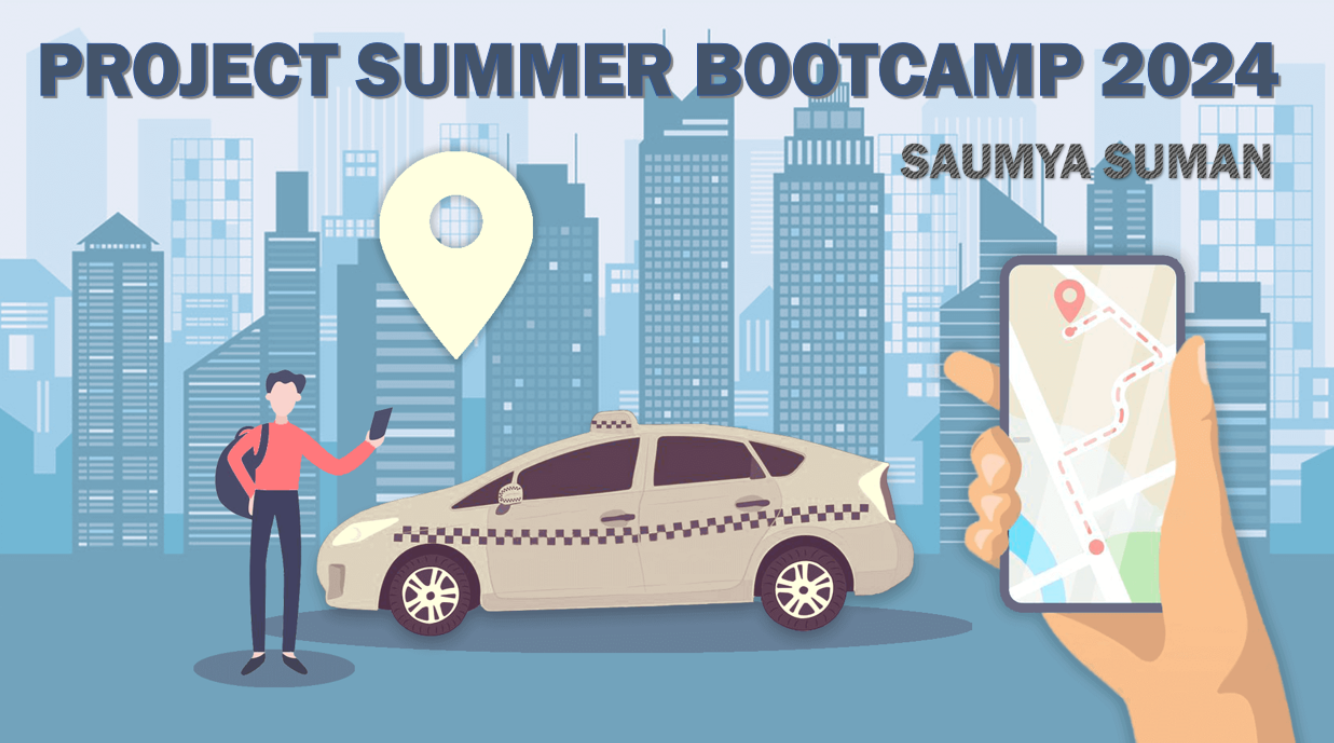

# Problem Statement / Objective

# Index

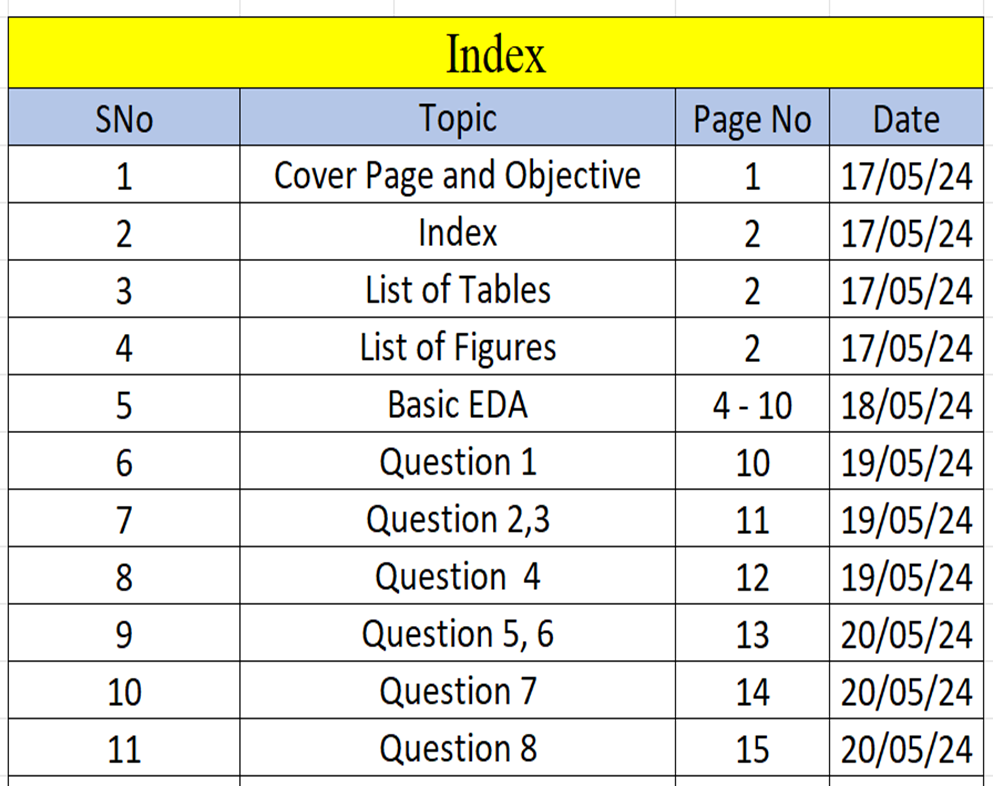

# List of Tables

# List of Figures

## Importing Libraries

In [1]:
import seaborn as sns
import pandas as pd
import warnings
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Basic Steps


## Load dataset

In [2]:
df = pd.read_csv("3-Uber_Data_New.csv")

### 1 -Display the top 5 rows

In [3]:
df.head()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
0,1/1/2015 1:00,Bronx,152.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
2,1/1/2015 1:00,EWR,0.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
3,1/1/2015 1:00,Manhattan,5258.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y
4,1/1/2015 1:00,Queens,405.0,5.0,10.0,30.0,7.0,1023.5,0.0,0.0,0.0,0.0,Y


### 2- Display the last 5 rows

In [4]:
df.tail()

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
29096,30-06-2015 23:00,EWR,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29097,30-06-2015 23:00,Manhattan,3828.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29098,30-06-2015 23:00,Queens,580.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29099,30-06-2015 23:00,Staten Island,0.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N
29100,30-06-2015 23:00,NaN,3.0,7.0,10.0,75.0,65.0,1011.8,0.0,0.0,0.0,0.0,N


### 3- Shape of dataset

In [5]:
df.shape

(29101, 13)

## Observation
* The dataset is having 17766 rows and 17 columns

### 4 - Datatypes of each features

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    26058 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       28742 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


### Observation


### 5 - Statistical Summary

In [7]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,28742.000000,29101.000000,2.910100e+04,29101.000000,29101.000000,29101.000000,29101.000000
mean,490.236022,5.984924,8.818125,47.900262,30.823065,1.052633e+03,0.003830,0.026129,0.090464,2.529169
std,995.680628,3.699007,2.442897,19.800541,21.283444,5.945147e+03,0.018933,0.093125,0.219402,4.520325
min,0.000000,0.000000,0.000000,0.000000,-16.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1.012500e+03,0.000000,0.000000,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1.018200e+03,0.000000,0.000000,0.000000,0.000000
75%,449.000000,8.000000,10.000000,65.000000,50.000000,1.022900e+03,0.000000,0.000000,0.050000,2.958333
max,7883.000000,21.000000,10.000000,89.000000,73.000000,1.015200e+06,0.280000,1.240000,2.100000,19.000000


### 6 - Null values

In [8]:
df.isnull().sum()

pickup_dt       0
borough      3043
pickups         2
spd             0
vsb             0
temp          359
dewp            0
slp             0
pcp01           0
pcp06           0
pcp24           0
sd              0
hday            0
dtype: int64

### Observation
* Borough contains 3043 null values, needs to be checked
* pickups contains 2 null values, needs to be checked
* temp contains 359 null values, needs to be checked

### 7 - Duplicate values

In [9]:
df.duplicated().sum()

0

### Observation
* Data set contains no duplicate values

### 8 - Anomalies or wrong entry

In [10]:
df[df.isin(['', ' ', '?', 'None']).any(axis = 1)]

,pickup_dt,borough,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd,hday
1,1/1/2015 1:00,Brooklyn,1519.0,5.0,10.0,NaN,7.0,1023.5,0.0,0.0,0.0,0.0,?
123,1/1/2015 19:00,Queens,238.0,7.0,10.0,37.0,7.0,1016.2,0.0,0.0,0.0,0.0,?


### Observation
* hday contains contains '?'
* hday at row 1 and 123 needs further checking.

## 9 - Check the outliers and their authenticity

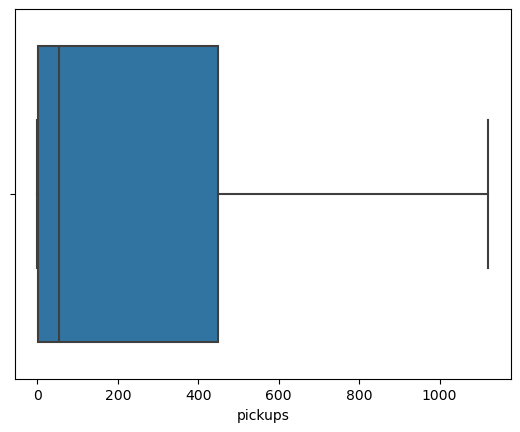

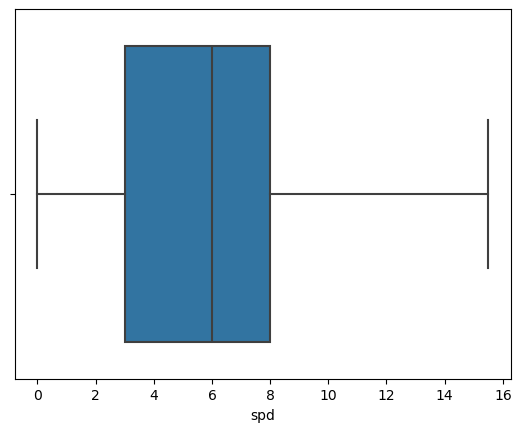

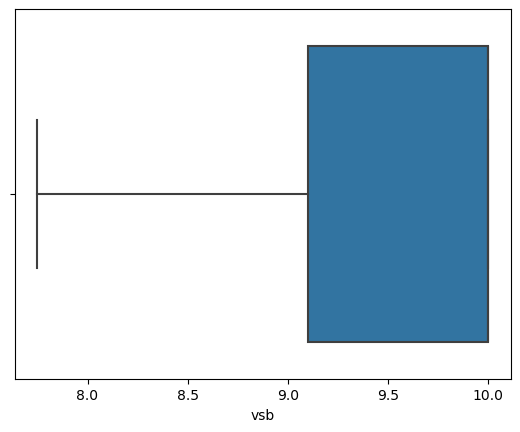

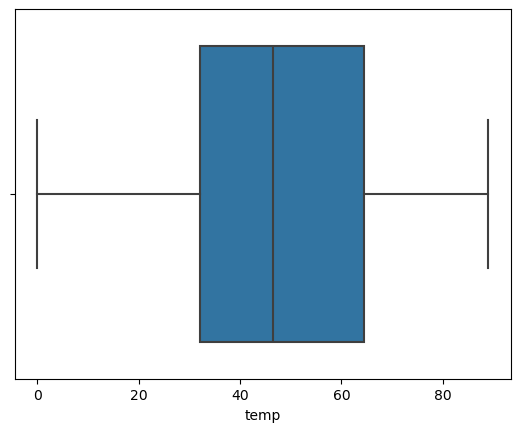

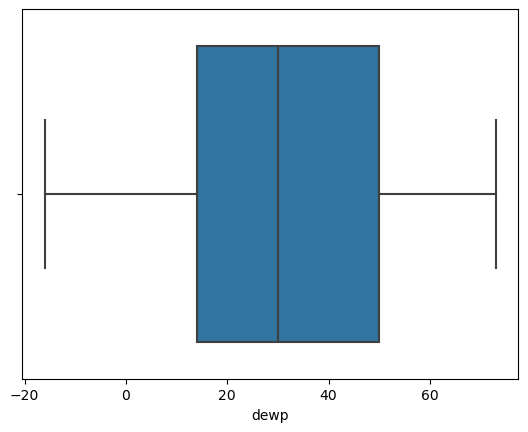

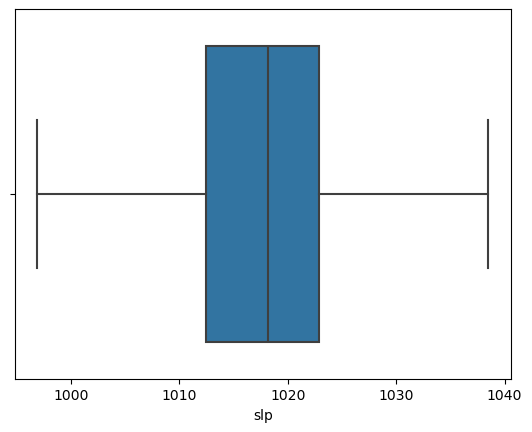

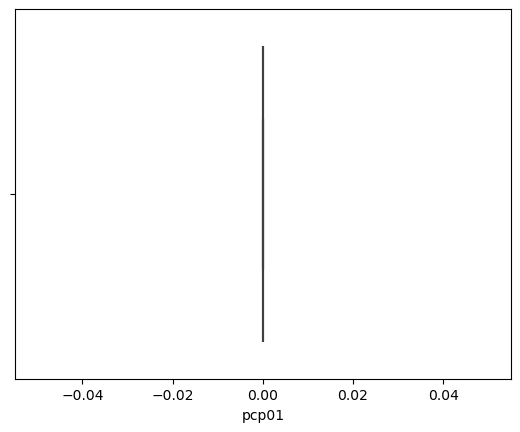

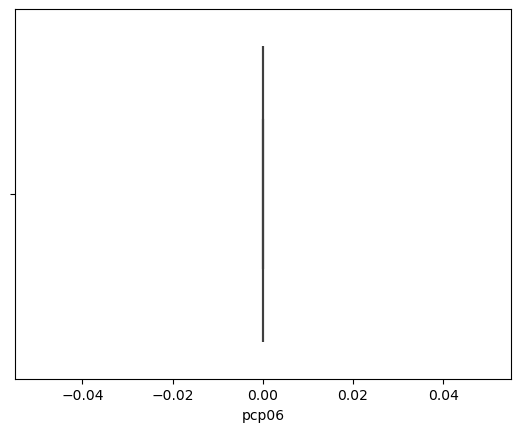

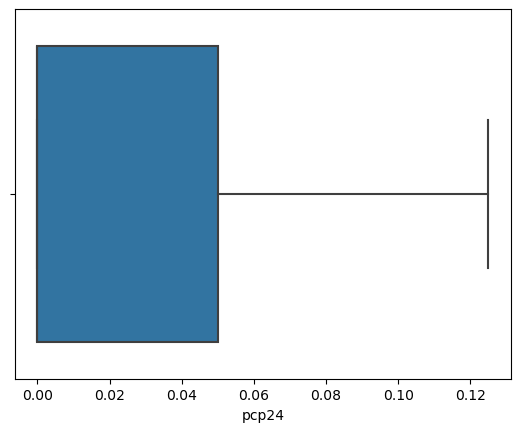

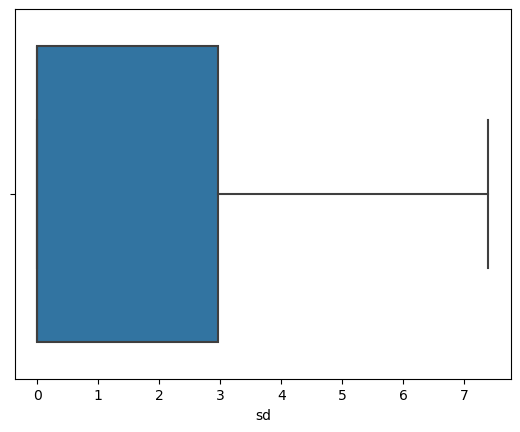

In [18]:
for i in df.columns:
    if df[i].dtype != 'object':
        sns.boxplot(data = df, x = i)
        plt.show()

### Observation
* After removing anomalies and converting datatypes of each columns with wrong entries, the outliers representation through box plot are
  

## 10 - Cleaning Data

In [11]:
df["hday"] = df["hday"].replace('?', np.nan)

In [12]:
mode1 = df['hday'].mode()
mode1 = mode1[0]
df['hday'].replace( np.nan ,mode1, inplace = True)

In [13]:
df["hday"] = df["hday"].astype('object')

In [14]:
mode2 = df['borough'].mode()
mode2 = mode2[0]
df['borough'].replace( np.nan ,mode2, inplace = True)

In [15]:
df["borough"] = df["borough"].astype('object')

In [16]:
median1 = df['temp'].median()
df['temp'].replace( np.nan ,median1, inplace = True)

In [17]:
#Remove outliers
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range    

for i in df.columns:
    if df[i].dtype !='object':
        lr,ur=remove_outlier(df[i])
        df[i]=np.where(df[i]>ur,ur,df[i])
        df[i]=np.where(df[i]<lr,lr,df[i])

### Rechecking information after Data Cleaning

In [19]:
df.isnull().sum()

pickup_dt    0
borough      0
pickups      2
spd          0
vsb          0
temp         0
dewp         0
slp          0
pcp01        0
pcp06        0
pcp24        0
sd           0
hday         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29101 entries, 0 to 29100
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pickup_dt  29101 non-null  object 
 1   borough    29101 non-null  object 
 2   pickups    29099 non-null  float64
 3   spd        29101 non-null  float64
 4   vsb        29101 non-null  float64
 5   temp       29101 non-null  float64
 6   dewp       29101 non-null  float64
 7   slp        29101 non-null  float64
 8   pcp01      29101 non-null  float64
 9   pcp06      29101 non-null  float64
 10  pcp24      29101 non-null  float64
 11  sd         29101 non-null  float64
 12  hday       29101 non-null  object 
dtypes: float64(10), object(3)
memory usage: 2.9+ MB


In [21]:
df.describe()

,pickups,spd,vsb,temp,dewp,slp,pcp01,pcp06,pcp24,sd
count,29099.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.000000,29101.0,29101.0,29101.000000,29101.000000
mean,282.060930,5.961970,9.487576,47.882988,30.823065,1017.810618,0.0,0.0,0.030223,1.861165
std,386.669555,3.631521,0.906658,19.678631,21.283444,7.701187,0.0,0.0,0.049091,3.104397
min,0.000000,0.000000,7.750000,0.000000,-16.000000,996.900000,0.0,0.0,0.000000,0.000000
25%,1.000000,3.000000,9.100000,32.000000,14.000000,1012.500000,0.0,0.0,0.000000,0.000000
50%,54.000000,6.000000,10.000000,46.500000,30.000000,1018.200000,0.0,0.0,0.000000,0.000000
75%,449.000000,8.000000,10.000000,64.500000,50.000000,1022.900000,0.0,0.0,0.050000,2.958333
max,1121.000000,15.500000,10.000000,89.000000,73.000000,1038.500000,0.0,0.0,0.125000,7.395833


### Observation
* Updated '?' to null value in columns- hday
* Null values of columns borough replaced by mode
* Null values of columns temp replaced by median
* Outliers of every columns has been removed

### Check if any data is beyond acceptance

In [22]:
df.isnull().sum()/len(df)*100

pickup_dt    0.000000
borough      0.000000
pickups      0.006873
spd          0.000000
vsb          0.000000
temp         0.000000
dewp         0.000000
slp          0.000000
pcp01        0.000000
pcp06        0.000000
pcp24        0.000000
sd           0.000000
hday         0.000000
dtype: float64

### Question 1

#### Pickup Analysis
* What is the total number of Uber pickups across all boroughs?
* Which borough has the highest average number of hourly pickups?
* How do the number of pickups vary across different hours of the day?
* Which day of the week has the highest number of pis?

In [24]:
# Ans 1.1
total_pickups = df['pickups'].sum()
print('Total number of Uber pickups:')
total_pickups

Total number of Uber pickups:


8207691.0

In [25]:
# Ans 1.2
average_hourly_pickups = df.groupby('borough')['pickups'].mean()
highest_avg_pickups_borough = average_hourly_pickups.idxmax()
print(f"Borough with the highest average number of hourly pickups: {highest_avg_pickups_borough}")

Borough with the highest average number of hourly pickups: Manhattan


In [26]:
# Ans 1.3
hourly_pickups = df.groupby('pickup_dt')['pickups'].sum().head(10)
print(f"Number of pickups by hour:\n{hourly_pickups}")

Number of pickups by hour:
pickup_dt
1/1/2015 10:00     654.0
1/1/2015 11:00     903.0
1/1/2015 12:00    1147.0
1/1/2015 13:00    1361.0
1/1/2015 14:00    1578.0
1/1/2015 15:00    1738.0
1/1/2015 16:00    1807.0
1/1/2015 17:00    1845.0
1/1/2015 18:00    1862.0
1/1/2015 19:00    1850.0
Name: pickups, dtype: float64


In [27]:
# Ans 1.4
daily_pickups = df.groupby('hday')['pickups'].sum()
highest_pickups_day = daily_pickups.idxmax()
print(f"Day of the week with the highest number of pickups: {highest_pickups_day}")

Day of the week with the highest number of pickups: N


### Questions 2

In [28]:
correlation = df['temp'].corr(df['pickups'])
print(f"Correlation between temperature and number of pickups: {correlation}")

Correlation between temperature and number of pickups: 0.0681083346189121


In [29]:
correlation = df['vsb'].corr(df['pickups'])
print(f"Correlation between visibility and number of pickups: {correlation}")

Correlation between visibility and number of pickups: -0.0028284850517368513


In [30]:
correlation = df['spd'].corr(df['pickups'])
print(f"Correlation between wind speed and number of pickups: {correlation}")

Correlation between wind speed and number of pickups: -0.005210525946147769


In [31]:
correlation_pcp01 = df['pcp01'].corr(df['pickups'])
correlation_pcp06 = df['pcp06'].corr(df['pickups'])
correlation_pcp24 = df['pcp24'].corr(df['pickups'])

print(f"Correlation between 1-hour precipitation and number of pickups: {correlation_pcp01}")
print(f"Correlation between 6-hour precipitation and number of pickups: {correlation_pcp06}")
print(f"Correlation between 24-hour precipitation and number of pickups: {correlation_pcp24}")

Correlation between 1-hour precipitation and number of pickups: nan
Correlation between 6-hour precipitation and number of pickups: nan
Correlation between 24-hour precipitation and number of pickups: -0.01664088365561561


### Observation
* A correlation coefficient of 0.06 suggests a very weak positive correlation between temperature and the number of pickups
* A correlation coefficient of -0.002 indicates a very weak and almost negligible negative correlation between visibility (vsb) and the number of pickups (pickups).
* A correlation coefficient of -0.005 indicates a very weak and almost negligible negative correlation between wind speed (spd) and the number of pickups (pickups).
* pcp01 and pcp06: NaN values mean no data available, so no correlation calculated.
* pcp24: Has a weak negative correlation with pickups, suggesting a minimal impact of 24-hour precipitation on the number of Uber pickups.

### Questions 3

In [35]:
# Ans 3.1
df.groupby('hday')['pickups'].mean()

hday
N    282.180652
Y    279.061773
Name: pickups, dtype: float64

In [38]:
correlation_sd = df['sd'].corr(df['pickups'])
correlation_sd

-0.025384465503119083

### Observation
* A correlation of -0.025 indicates a very weak negative relationship between snow depth (sd) and the number of pickups, suggesting that snow depth has little to no influence on the number of pickups in this dataset.

### Question 4

In [63]:
z=[]
for j in [i[1].split(':') for i in df['pickup_dt'].str.split(' ')]:
    z. append(int(j[0]))
df['Hours']=z

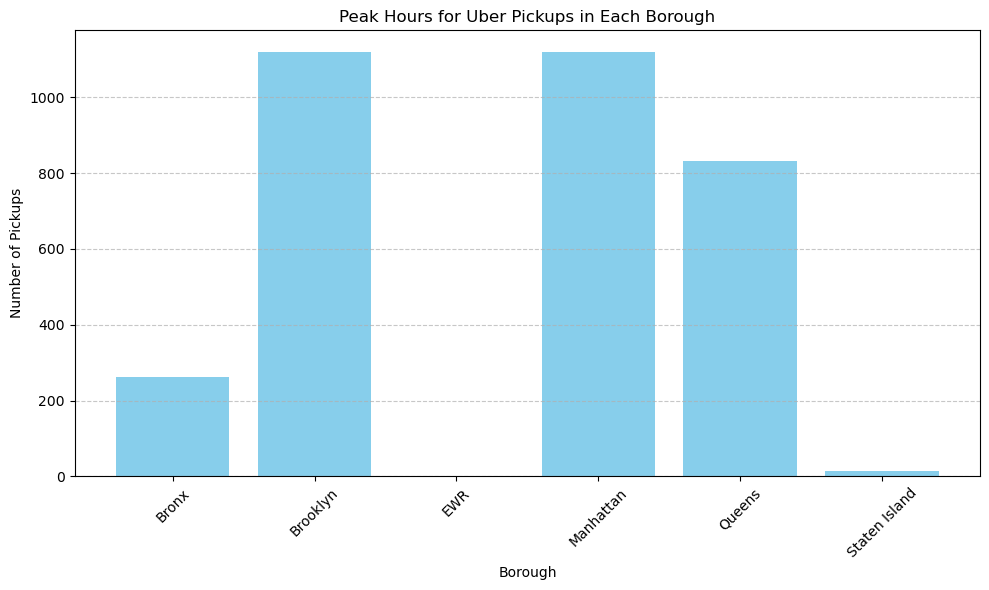

In [81]:
# Ans 4.1
boroughs = df['borough']
pickups = df['pickups']

plt.figure(figsize=(10, 6))
plt.bar(boroughs, pickups, color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Number of Pickups')
plt.title('Peak Hours for Uber Pickups in Each Borough')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

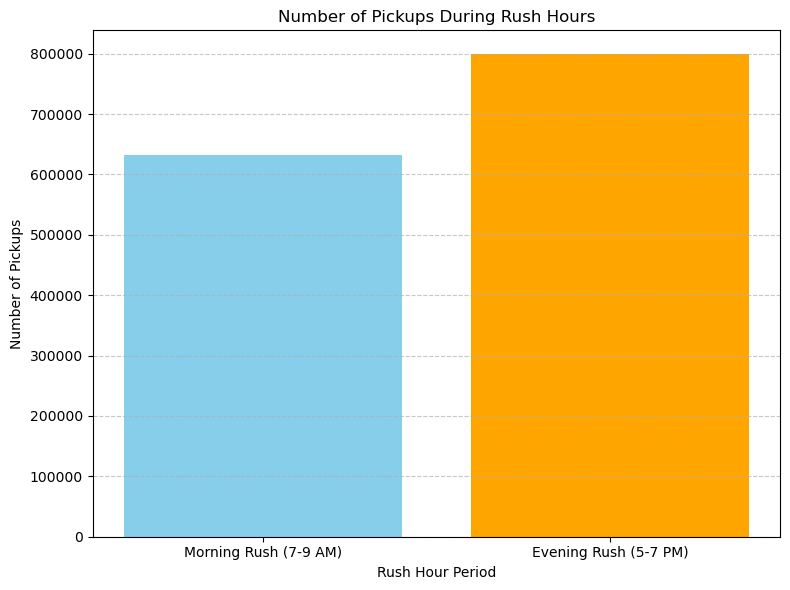

In [77]:
# Ans 4.2
rush_hour_morning = df[(df['hour'] >= 7) & (df['hour'] < 9)]
rush_hour_evening = df[(df['hour'] >= 17) & (df['hour'] < 19)]

pickups_morning = rush_hour_morning['pickups'].sum()
pickups_evening = rush_hour_evening['pickups'].sum()

plt.figure(figsize=(8, 6))
plt.bar(['Morning Rush (7-9 AM)', 'Evening Rush (5-7 PM)'], [pickups_morning, pickups_evening], color=['skyblue', 'orange'])
plt.xlabel('Rush Hour Period')
plt.ylabel('Number of Pickups')
plt.title('Number of Pickups During Rush Hours')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [78]:
# Answer 4.3
average_pickups_late_night = df[(df['hour'] >= 0) & (df['hour'] < 4)]['pickups'].mean()
print("Average number of pickups during late-night hours (12 AM - 4 AM):", average_pickups_late_night)

Average number of pickups during late-night hours (12 AM - 4 AM): 243.31617958492166


### Question 5

In [59]:
# Ans 5.1
pickup_trends_weather = df.groupby(['borough', 'hday', 'temp', 'dewp', 'pcp01', 'pcp06', 'pcp24', 'sd'])['pickups'].mean().reset_index()
pickup_trends_weather.head(10)

,borough,hday,temp,dewp,pcp01,pcp06,pcp24,sd,pickups
0,Bronx,N,2.0,-16.0,0.0,0.0,0.0900,7.395833,27.200000
1,Bronx,N,3.0,-16.0,0.0,0.0,0.0900,7.395833,24.000000
2,Bronx,N,3.0,-15.0,0.0,0.0,0.0900,7.395833,36.000000
3,Bronx,N,4.0,-15.0,0.0,0.0,0.0900,7.395833,42.333333
4,Bronx,N,4.0,-11.0,0.0,0.0,0.0525,7.395833,38.000000
5,Bronx,N,5.0,-16.0,0.0,0.0,0.0900,7.395833,31.500000
6,Bronx,N,5.0,-11.0,0.0,0.0,0.0000,7.395833,24.000000
7,Bronx,N,5.0,-10.0,0.0,0.0,0.0075,7.395833,27.500000
8,Bronx,N,6.0,-15.0,0.0,0.0,0.0900,7.395833,19.500000
9,Bronx,N,6.0,-13.0,0.0,0.0,0.0900,7.395833,58.000000


In [60]:
# Ans 5.2
holiday_pickups_increase = df[df['hday'] == 'Y'].groupby('borough')['pickups'].mean() - df[df['hday'] == 'N'].groupby('borough')['pickups'].mean()
borough_max_increase = holiday_pickups_increase.idxmax()
borough_max_increase

'Queens'

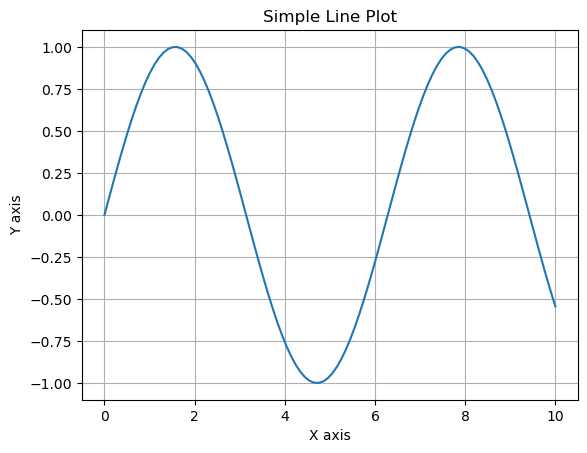

In [79]:
# Ans 5.3

# Generate some data
x = np.linspace(0, 10, 100)
y = np.sin(x)

# Plotting
plt.plot(x, y)
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.title('Simple Line Plot')
plt.grid(True)
plt.show()

### Question 6

In [85]:
# Ans 6.1
extreme_pickups = df[(df['temp'] > 80) | (df['temp'] < 20) | (df['pcp01'] > 0.5) | (df['pcp06'] > 6)]['pickups'].sum()
total_pickups = df['pickups'].sum()
percentage_extreme_pickups = (extreme_pickups / total_pickups) * 100
print(f"Percentage of pickups during extreme weather conditions: {percentage_extreme_pickups:.2f}%")

Percentage of pickups during extreme weather conditions: 11.11%


In [87]:
# Ans 6.2
impact_pickups_low_visibility = df[df['vsb'] < 1]['pickups'].sum()
print(f"Total pickups during visibility less than 1 mile: {impact_pickups_low_visibility}")

Total pickups during visibility less than 1 mile: 0.0


### Observation
* Percentage of pickups during extreme weather conditions: 11.11%
* Total pickups during visibility less than 1 mile: 0.0

### Question 7

In [91]:
# Ans 7.1
correlation_slp_pickups = df['slp'].corr(df['pickups'])
print(f"Correlation between sea level pressure and pickups: {correlation_slp_pickups:.2f}")

Correlation between sea level pressure and pickups: -0.01


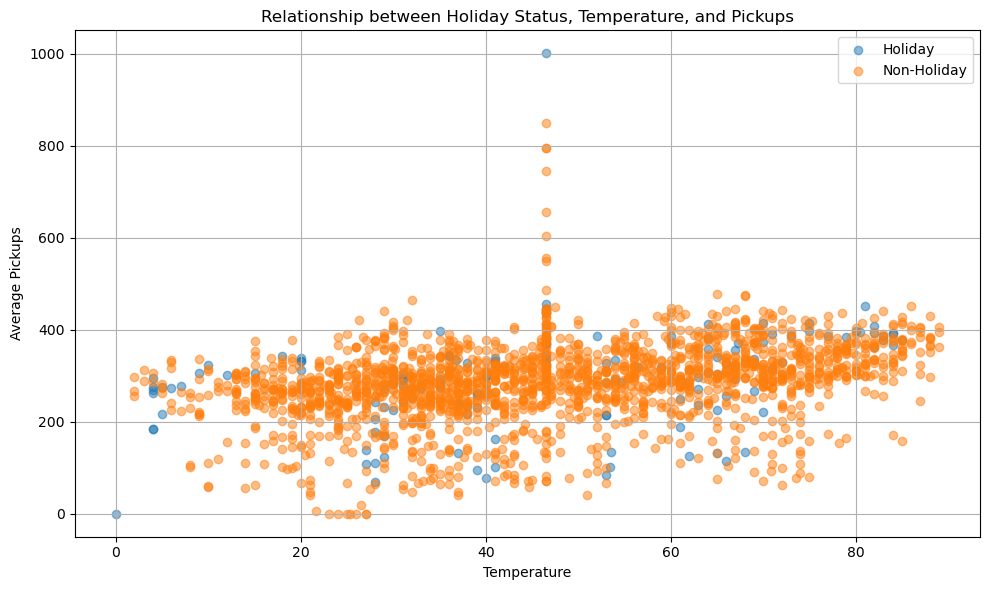

In [90]:
# Ans 7.2
grouped_data = df.groupby(['hday', 'temp', 'spd', 'vsb'])['pickups'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.scatter(grouped_data[grouped_data['hday'] == 'Y']['temp'], grouped_data[grouped_data['hday'] == 'Y']['pickups'], label='Holiday', alpha=0.5)
plt.scatter(grouped_data[grouped_data['hday'] == 'N']['temp'], grouped_data[grouped_data['hday'] == 'N']['pickups'], label='Non-Holiday', alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Average Pickups')
plt.title('Relationship between Holiday Status, Temperature, and Pickups')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation
* The correlation coefficient of -0.01 suggests a very weak negative correlation between sea level pressure (slp) and the number of pickup

### Question 8

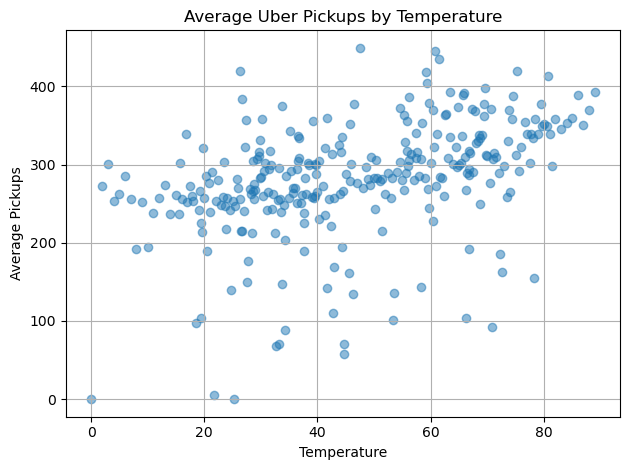

In [94]:
# Ans 8.1
favorable_conditions = df.groupby(['temp'])['pickups'].mean().reset_index()
plt.scatter(favorable_conditions['temp'], favorable_conditions['pickups'], alpha=0.5)
plt.xlabel('Temperature')
plt.ylabel('Average Pickups')
plt.title('Average Uber Pickups by Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

### Observation
* The temperature between 30 to 70 is the favourable temperature for pickup
* 